In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [5]:
data = pd.read_csv(r"E:/data.csv")

In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96904 entries, 0 to 96903
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rt           96904 non-null  float64
 1   nNegative    96904 non-null  int64  
 2   percolatorq  96904 non-null  float64
 3   z            96904 non-null  int64  
 4   m.z          96904 non-null  float64
 5   centroid     96904 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 4.4 MB


In [4]:
data.describe()

rt     nNegative   percolatorq             z           m.z  \
count  96904.000000  96904.000000  96904.000000  96904.000000  96904.000000   
mean      43.997283      2.110367      0.000874      2.226523    715.964836   
std       18.322716      1.826320      0.001699      0.469415    215.474380   
min        0.480000      0.000000      0.000012      2.000000    375.680200   
25%       29.065031      1.000000      0.000063      2.000000    551.772200   
50%       44.297986      2.000000      0.000131      2.000000    672.330100   
75%       59.453731      3.000000      0.000779      2.000000    837.419755   
max       86.989770     30.000000      0.009999      7.000000   1499.768790   

           centroid  
count  96904.000000  
mean     -53.198842  
std       16.008965  
min     -105.000000  
25%      -63.405999  
50%      -50.484360  
75%      -41.088635  
max      -17.500000

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X = data.drop('centroid', axis =1)
y = data['centroid']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
rfr = RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [22]:
data['rt'].reshape(1,-1)

AttributeError: 'Series' object has no attribute 'reshape'

In [244]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [10]:
pred_rfr = rfr.predict(X_test)

In [18]:
import statsmodels.api as sm

In [11]:
from sklearn import metrics

In [12]:
metrics.r2_score(y_test,pred_rfr)

0.536014593952695

# visualization the Random Forest Model

In [48]:
X_val = np.arange(min(data.rt), max(data.rt), 0.001)

In [36]:
import matplotlib.pyplot as plt 

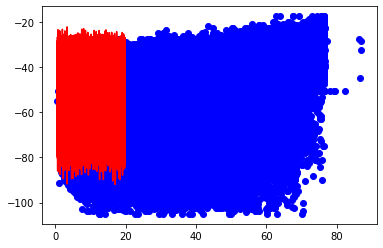

<Figure size 720000x72 with 0 Axes>

In [54]:
plt.scatter(data.rt, data.centroid, color = "blue")
plt.plot(X_val[0:pred_rfr.shape[0]], pred_rfr, color ="red")
plt.figure(figsize=(10000,1))
plt.show()

# MOdel Evaluation

1) MSE - over estimate model badness in presence of noisy data

In [13]:
metrics.mean_squared_error(y_test,pred_rfr)

120.38647595288201

2) RMSE - how concentrated the data is, around the best fit. Why RMSE over MSE - from squared scale to the same scale as the output is. 

In [14]:
np.sqrt(metrics.mean_squared_error(y_test,pred_rfr))

10.972077102940993

3) MAE - not sentitive to outlier

In [16]:
metrics.mean_absolute_error(y_test, pred_rfr)

8.062916688119172

In [82]:
threshold = 3
counter = 0
val_avg = 0
for i in range(X_test.shape[0]):
    if(np.abs(y_test.iloc[i] - pred_rfr[i]) <= threshold):
        val_avg += np.abs(y_test.iloc[i] - pred_rfr[i])
        counter += 1 
print("total observation is {} and counter comes for the threshold {} and val_avg {}".format(pred_rfr.shape[0] ,counter,val_avg/counter))

total observation is 19381 and counter comes for the threshold 5666 and val_avg 1.422692199029345


In [10]:
from scipy import stats

In [11]:
import seaborn as sns
from seaborn_qqplot import pplot 

<AxesSubplot:>

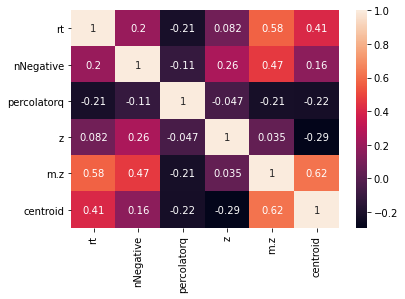

In [8]:
correlation = data.corr()
sns.heatmap(correlation, annot=True ,xticklabels = correlation.columns, yticklabels = correlation.columns)

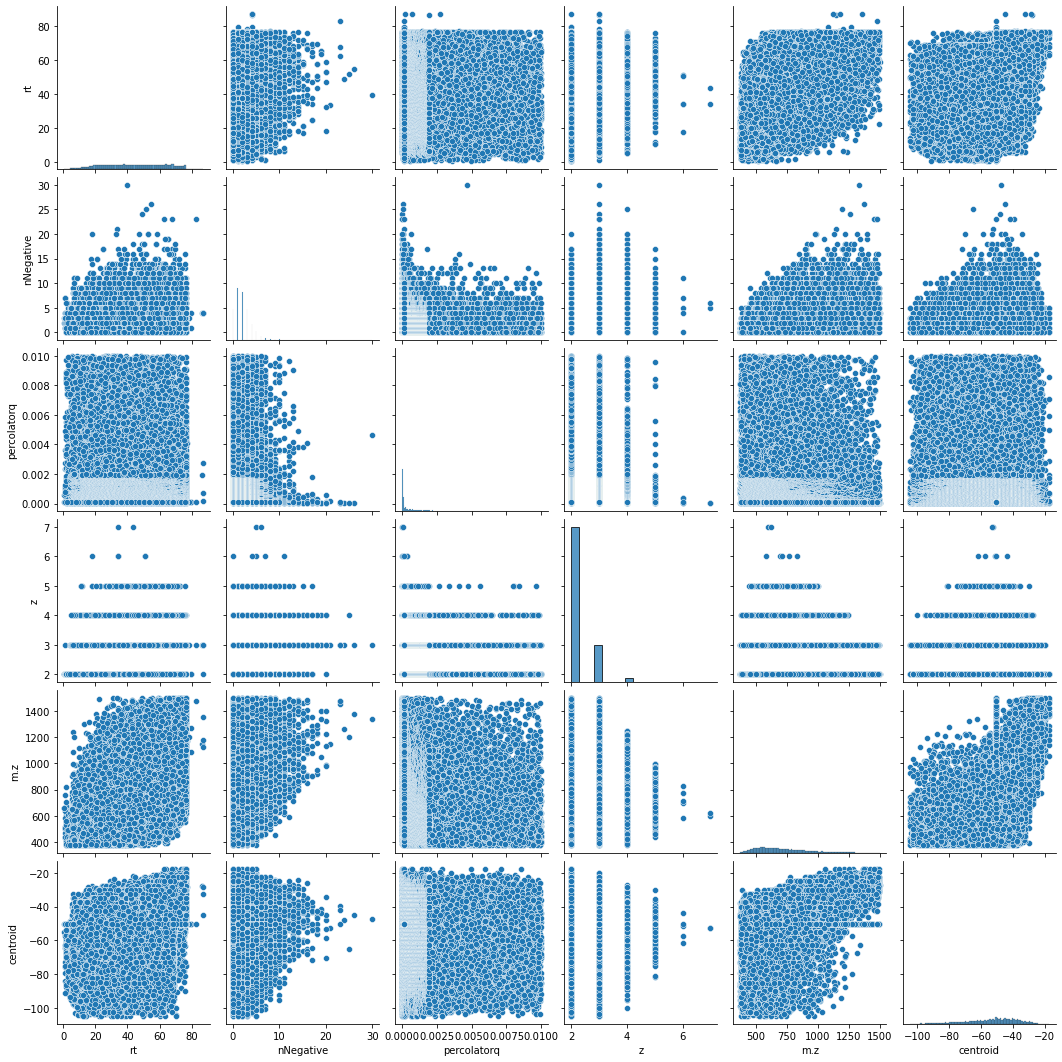

In [11]:
# bivariate plot
sns.pairplot(data)
# i think as much as plot looks like scatter plot means no correlation.  

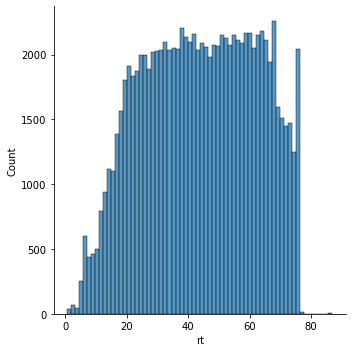

In [84]:
# univariate plot
sns.displot(data['rt'])

In [ ]:
#In practice, the Shapiro-Wilk test is believed to be a reliable test of normality,
# although there is some suggestion that the test may be suitable for smaller samples of data, 
# e.g. thousands of observations or fewer.

In [178]:
sample_data = data['rt']
stats.shapiro(sample_data.iloc[np.random.randint(0,sample_data.shape[0],5000)])

ShapiroResult(statistic=0.9740040898323059, pvalue=3.0657025077128935e-29)

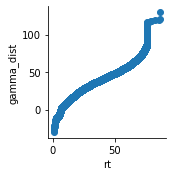

In [9]:
from seaborn_qqplot import pplot
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import poisson
pplot(data, x='rt', y=gamma, kind='qq')

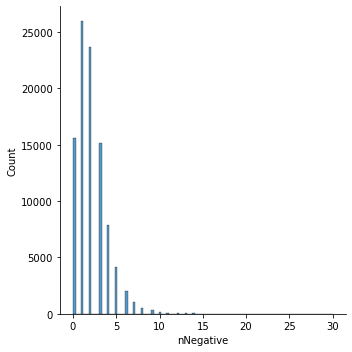

In [93]:
sns.displot(data['nNegative'], bins = 100)

In [101]:
# even qq plot shows it, as almost normal dist but p-value is 0 , confusion

In [185]:
sample_data = data['nNegative']
stats.shapiro(sample_data.iloc[np.random.randint(0,sample_data.shape[0],5000)])

ShapiroResult(statistic=0.8351107835769653, pvalue=0.0)

In [193]:
from scipy.stats import normaltest
from scipy.stats import anderson
sample_data = data['nNegative']
normaltest(sample_data.iloc[np.random.randint(0,sample_data.shape[0],5000)])

NormaltestResult(statistic=2500.1310118187657, pvalue=0.0)

In [194]:
sample_data = data['nNegative']
anderson(sample_data.iloc[np.random.randint(0,sample_data.shape[0],5000)])
# if statistic < critical value only then normal dist

AndersonResult(statistic=159.06630899043375, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

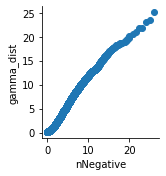

In [43]:
pplot(data, x='nNegative', y=gamma, kind='qq')   # it looks like poisson distribution almost normal distribution.

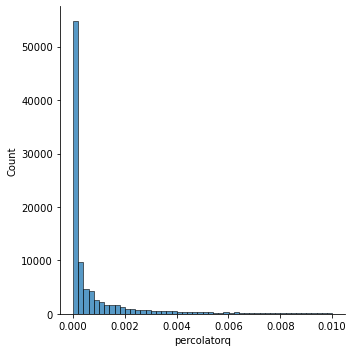

In [45]:
sns.displot(data['percolatorq'], bins =50)

In [139]:
sample_data = data['percolatorq']
stats.shapiro(sample_data.iloc[np.random.randint(0,sample_data.shape[0],5000)])

ShapiroResult(statistic=0.5499765276908875, pvalue=0.0)

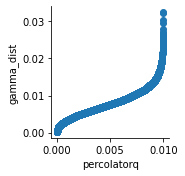

In [25]:
pplot(data, x='percolatorq', y=gamma, kind='qq')

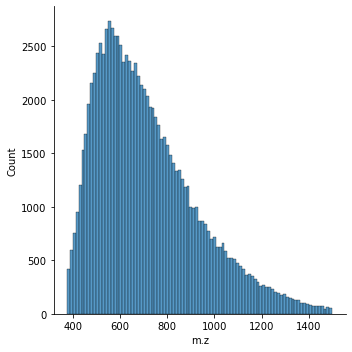

In [13]:
sns.displot(data['m.z'])

In [14]:
sample_data = np.log(data['m.z'])
stats.shapiro(sample_data.iloc[np.random.randint(0,sample_data.shape[0],5000)])

ShapiroResult(statistic=0.9863758087158203, pvalue=1.4188828370184728e-21)

In [232]:
# boxcox argument
#lambda = -1. is a reciprocal transform.
#lambda = -0.5 is a reciprocal square root transform.
#lambda = 0.0 is a log transform.
#lambda = 0.5 is a square root transform.
#lambda = 1.0 is no transform.

In [231]:
from scipy.stats import boxcox
data = boxcox(data['m.z'])
stats.shapiro(sample_data.iloc[np.random.randint(0,sample_data.shape[0],1000)])

ShapiroResult(statistic=0.98692387342453, pvalue=8.71427019433213e-08)

In [215]:
sample_data = data['m.z']
stats.shapiro(sample_data.iloc[np.random.randint(0,sample_data.shape[0],1000)])

ShapiroResult(statistic=0.927911639213562, pvalue=1.656271152020904e-21)

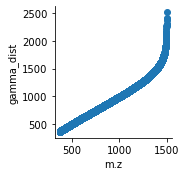

In [143]:
pplot(data, x='m.z', y=gamma, kind='qq')

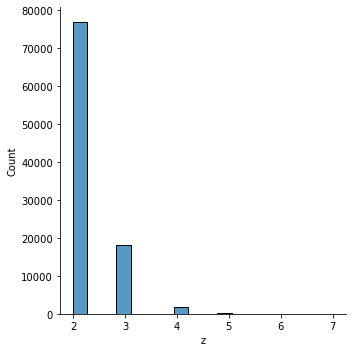

In [14]:
sns.displot(data['z'])

In [156]:
sample_data = data['z']
stats.shapiro(sample_data.iloc[np.random.randint(0,sample_data.shape[0],5000)])

ShapiroResult(statistic=0.5095410943031311, pvalue=0.0)

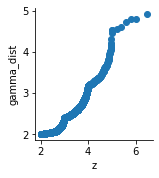

In [27]:
pplot(data, x='z', y=gamma, kind='qq')

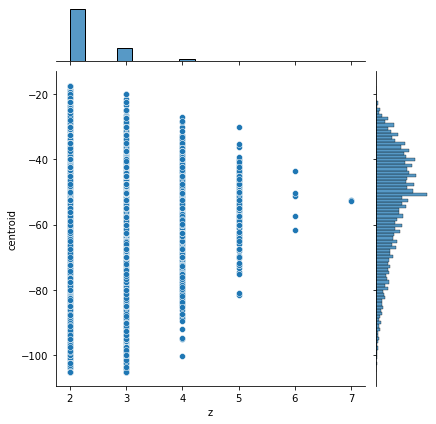

In [7]:
sns.jointplot(x='z',y='centroid', data=data)